In [ ]:
# generate an abstract graph based on results in database

# gather inputs
# look for the same graph or close enough
# draw the shape based on the shape
# check if program evaluates

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from absgraph.utils.converter import convert
from itertools import permutations
from random import sample, choice
from scipy.spatial.distance import canberra, cosine

import absgraph.generator as gen
import graphsim as gs
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

import collections 


Error: Not possible to draw cycles with this density, will proceed without cycles

Error: Not possible to draw cycles with this density, will proceed without cycles


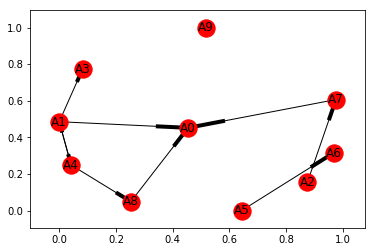

[('A1', 'A0'), ('A1', 'A4'), ('A1', 'A3'), ('A2', 'A7'), ('A4', 'A8'), ('A4', 'A1'), ('A5', 'A6'), ('A7', 'A0'), ('A8', 'A0')]


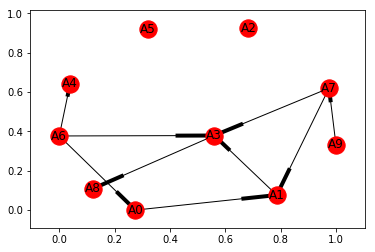

[('A0', 'A1'), ('A1', 'A3'), ('A3', 'A8'), ('A6', 'A4'), ('A6', 'A3'), ('A6', 'A0'), ('A7', 'A1'), ('A7', 'A3'), ('A9', 'A7')]


In [3]:
# draw random graphs
pars = {
    'n_nodes': 10,
    'density': 0.1,
    'n_cycles': 5,
}

g1 = gen.generate_random(pars)
g2 = gen.generate_random(pars)

graphs = [g1, g2]

for g in graphs:
    nx.draw_networkx(g, arrows=True)
    plt.show()
    print(g.edges())

In [4]:
# difference in SimRank using distance metrics
gsim1 = gs.simrank(g1)
gsim2 = gs.simrank(g2)

scores = collections.defaultdict(list)

for x, y in zip(gsim1, gsim2):
    scores['cosine'].append(1-cosine(x, y))
    scores['canberra'].append(canberra(x, y))

print('\n----------Similarity Scores----------\n')
for k, v in scores.items():
    score = sum(v) / len(v)
    print(k + ': ' + str(score))
print('\n-----------------End-----------------\n')

Converge after 3 iterations (eps=0.000100).
Converge after 3 iterations (eps=0.000100).

----------Similarity Scores----------

cosine: 0.943696221586
canberra: 0.760084033613

-----------------End-----------------



In [5]:
# using partial GFPC method
vf1, md1 = gen.partial_gfpc(g1)
vf2, md2 = gen.partial_gfpc(g2)

gf1 = [len(g1.nodes()), len(g1.edges()), 
       md1, nx.degree_assortativity_coefficient(g1)]
gf2 = [len(g2.nodes()), len(g2.edges()), 
       md2, nx.degree_assortativity_coefficient(g2)]

vf_dec1 = gen.fvec_decompose(vf1)
vf_dec2 = gen.fvec_decompose(vf2)

gamma = 0.3

print('\n----------GPFC g1----------\n')
print('vertex features: ' + str(vf1) + '\n')
print('max_degree: ' + str(md1) + '\n')
print('decomposed vertex features: ' + str(vf_dec1) + '\n')

print('\n----------GPFC g2----------\n')
print('vertex features: ' + str(vf2) + '\n')
print('max_degree: ' + str(md2) + '\n')
print('decomposed vertex features: ' + str(vf_dec2) + '\n')

print('\n----------Similarity Scores----------\n')
score_v = canberra(vf_dec1, vf_dec2)
score_g = canberra(gf1, gf2)
score_f = score_v * (1 - gamma + score_g * gamma)

print('Canberra between vertex features: ' + str(score_v))
print('Canberra between global features: ' + str(score_g))
print('Combined similarity score: ' + str(score_f))
print('\n-----------------End-----------------\n')


----------GPFC g1----------

vertex features: [[0.7071067811865476, 0.3535533905932738, 0.0, 0.3535533905932738, 0.3535533905932738, 0.0, 0.0, 0.0, 0.3535533905932738, 0.0], [0.25532100701733107, 0.09382664799941054, 0.05791469932281654, 0.08449879360049968, 0.08449879360049968, 0.05791469932281654, 0.10714200590719952, 0.10714200590719952, 0.09382664799941054, 0.05791469932281654], [0.0, 0.6666666666666666, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3, 4, 1, 1, 3, 1, 1, 2, 2, 0], [3, 1, 0, 1, 1, 0, 1, 1, 1, 0], [0, 3, 1, 0, 2, 1, 0, 1, 1, 0]]

max_degree: 4

decomposed vertex features: [0.21213203435596428, 0.23452078799117149, 0.055000000000000007, 0.6578429336242114, -0.6280991735537191, 0.7071067811865476, 0.0, 0.10000000000000002, 0.054860682338472376, 0.003009694466642775, 2.1295889019889174, 3.530302170803635, 0.25532100701733107, 0.05791469932281654, 0.36666666666666664, 0.6403124237432849, 0.41000000000000003, 1.6353805309961351, 1.4096106814726683, 2.0, 0.0, 1.8, 1.1661903789

In [6]:
# just to check again

# how many edges in both graphs and do any of them intersect?
print('\n---------- Basic Stats ----------\n')
print('g1 -> edges: ' + str(len(g1.edges())))
print('g2 -> edges: ' + str(len(g2.edges())))
print('intersection of edges: ' + str(set(g1.edges()) & set(g2.edges())))


---------- Basic Stats ----------

g1 -> edges: 9
g2 -> edges: 9
intersection of edges: {('A1', 'A3')}


In [7]:
# to prove again that this works, test it on the exact same graph
print('\n----------Similarity Scores----------\n')
score_v = canberra(vf_dec1, vf_dec1)
score_g = canberra(gf1, gf1)
score_f = score_v * (1 - gamma + score_g * gamma)

print('Canberra between vertex features: ' + str(score_v))
print('Canberra between global features: ' + str(score_g))
print('Combined similarity score: ' + str(score_f))
print('\n-----------------End-----------------\n')


----------Similarity Scores----------

Canberra between vertex features: 0.0
Canberra between global features: 0.0
Combined similarity score: 0.0

-----------------End-----------------



In [10]:
# now we will change just one edge in the graph and repeat the process

g3 = nx.DiGraph()

g3.add_nodes_from(g1.nodes())
g3.add_edges_from(g1.edges())

# randomly remove and edge and randomly add an edge
random_edge = choice(g3.edges())
random_nodes = sample(g3.nodes(), 2)
print(random_edge, random_nodes)

g3.remove_edge(random_edge[0], random_edge[1])
g3.add_edge(random_nodes[0], random_nodes[1])

# create fingerprint
vf3, md3 = gen.partial_gfpc(g3)
gf3 = [len(g3.nodes()), len(g3.edges()), 
       md3, nx.degree_assortativity_coefficient(g3)]
vf_dec3 = gen.fvec_decompose(vf3)

# now, compute similarity score again
# simrank
gsim3 = gs.simrank(g3)

scores = collections.defaultdict(list)

for x, y in zip(gsim1, gsim3):
    scores['cosine'].append(1-cosine(x, y))
    scores['canberra'].append(canberra(x, y))

print('\n----------Similarity Scores----------\n')
print('---------------SimRank---------------')
for k, v in scores.items():
    score = sum(v) / len(v)
    print(k + ': ' + str(score))
print('\n-----------------End-----------------\n')

# gfpc
print('\n----------Similarity Scores----------\n')
print('--------------- GFPC ----------------')
score_v = canberra(vf_dec1, vf_dec3)
score_g = canberra(gf1, gf3)
score_f = score_v * (1 - gamma + score_g * gamma)

print('Canberra between vertex features: ' + str(score_v))
print('Canberra between global features: ' + str(score_g))
print('Combined similarity score: ' + str(score_f))
print('\n-----------------End-----------------\n')

('A8', 'A0') ['A6', 'A8']
Converge after 2 iterations (eps=0.000100).

----------Similarity Scores----------

---------------SimRank---------------
cosine: 0.990760421307
canberra: 0.10303030303

-----------------End-----------------


----------Similarity Scores----------

--------------- GFPC ----------------
Canberra between vertex features: 8.53687254875
Canberra between global features: 0.116963119775
Combined similarity score: 6.27536055806

-----------------End-----------------



In [9]:
# now we will remove just one edge in the graph and repeat the process

g4 = nx.DiGraph()

g4.add_nodes_from(g1.nodes())
g4.add_edges_from(g1.edges())

# modify the first one to point to A4 instead
random_edge = choice(g4.edges())
g4.remove_edge(random_edge[0], random_edge[1])

# create fingerprint
vf4, md4 = gen.partial_gfpc(g4)
gf4 = [len(g4.nodes()), len(g4.edges()), 
       md4, nx.degree_assortativity_coefficient(g4)]
vf_dec4 = gen.fvec_decompose(vf4)

# now, compute similarity score again
# simrank
gsim4 = gs.simrank(g4)

scores = collections.defaultdict(list)

for x, y in zip(gsim1, gsim4):
    scores['cosine'].append(1-cosine(x, y))
    scores['canberra'].append(canberra(x, y))

print('\n----------Similarity Scores----------\n')
for k, v in scores.items():
    score = sum(v) / len(v)
    print(k + ': ' + str(score))
print('\n-----------------End-----------------\n')

# gfpc
print('\n----------Similarity Scores----------\n')
score_v = canberra(vf_dec1, vf_dec4)
score_g = canberra(gf1, gf4)
score_f = score_v * (1 - gamma + score_g * gamma)

print('Canberra between vertex features: ' + str(score_v))
print('Canberra between global features: ' + str(score_g))
print('Combined similarity score: ' + str(score_f))
print('\n-----------------End-----------------\n')

Converge after 2 iterations (eps=0.000100).

----------Similarity Scores----------

cosine: 0.99935554042
canberra: 0.0363636363636

-----------------End-----------------


----------Similarity Scores----------

Canberra between vertex features: 9.27369393086
Canberra between global features: 1.05882352941
Combined similarity score: 9.43734735317

-----------------End-----------------



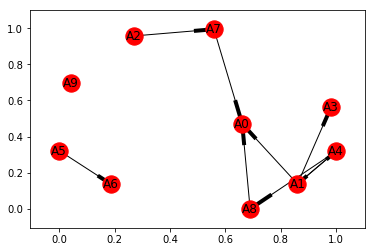

[('A1', 'A0'), ('A1', 'A4'), ('A1', 'A3'), ('A2', 'A7'), ('A4', 'A8'), ('A4', 'A1'), ('A5', 'A6'), ('A7', 'A0'), ('A8', 'A0')]


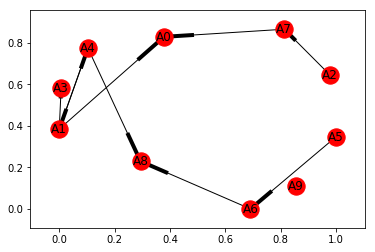

[('A1', 'A0'), ('A1', 'A4'), ('A1', 'A3'), ('A2', 'A7'), ('A4', 'A8'), ('A4', 'A1'), ('A5', 'A6'), ('A6', 'A8'), ('A7', 'A0')]


In [11]:
graphs = [g1, g3]

for g in graphs:
    nx.draw_networkx(g, arrows=True)
    plt.show()
    print(g.edges())

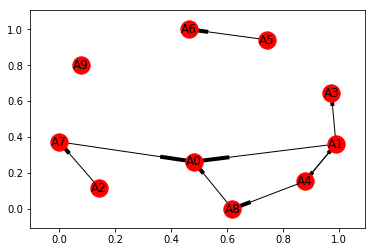

[('A1', 'A0'), ('A1', 'A4'), ('A1', 'A3'), ('A2', 'A7'), ('A4', 'A8'), ('A4', 'A1'), ('A5', 'A6'), ('A7', 'A0'), ('A8', 'A0')]


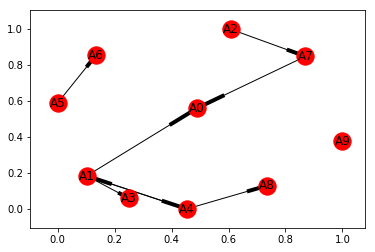

[('A1', 'A0'), ('A1', 'A4'), ('A1', 'A3'), ('A2', 'A7'), ('A4', 'A8'), ('A4', 'A1'), ('A5', 'A6'), ('A7', 'A0')]


In [12]:
graphs = [g1, g4]

for g in graphs:
    nx.draw_networkx(g, arrows=True)
    plt.show()
    print(g.edges())

In [13]:
set(g1.edges()) - set(g4.edges())

{('A8', 'A0')}

success!
{'_id': '11629', 'n_nodes': 20, 'n_edges': 12, 'n_cycles': 0, 'n_ext': 1, 'n_rules': 1, 'n_contrary': [0, 12], 'density': 0.06315789473684211, 'avg_eval_time': [0.011025508244832357, 0.49532095591227215], 'abs': {'defeats': ['A10>A0', 'A11>A1', 'A12>A2', 'A3>A19', 'A4>A19', 'A5>A0', 'A15>A18', 'A6>A7', 'A16>A0', 'A17>A2', 'A8>A0', 'A9>A0'], 'arguments': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19']}, 'eval': {'defeat': ['A10>A0', 'A11>A1', 'A12>A2', 'A3>A19', 'A4>A19', 'A5>A0', 'A15>A18', 'A6>A7', 'A16>A0', 'A17>A2', 'A8>A0', 'A9>A0'], 'wellformed': True, 'extensions': [['A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A3', 'A4', 'A5', 'A6', 'A8', 'A9']], 'arguments': ['A10:->Q10', 'A11:->Q13', 'A12:->Q12', 'A13:->Q14', 'A14:A13=>Q15', 'A15:->Q17', 'A16:->Q16', 'A17:->Q19', 'A18:->Q18', 'A19:->Q0', 'A0:->Q1', 'A1:->Q2', 'A2:->Q3', 'A3:->Q4', 'A4:->Q5', 'A5:->Q6', 'A6:->Q7', 'A7:->Q8', 

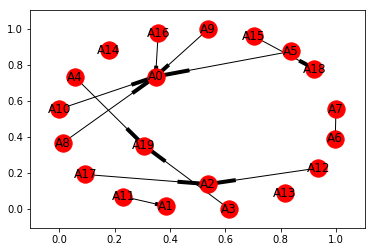

[('A3', 'A19'), ('A4', 'A19'), ('A5', 'A0'), ('A6', 'A7'), ('A8', 'A0'), ('A9', 'A0'), ('A10', 'A0'), ('A11', 'A1'), ('A12', 'A2'), ('A15', 'A18'), ('A16', 'A0'), ('A17', 'A2')]


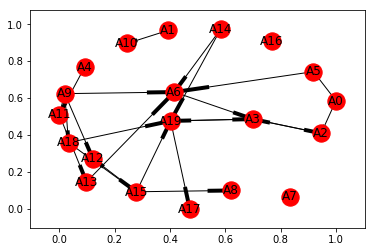

[('A0', 'A5'), ('A0', 'A2'), ('A1', 'A10'), ('A2', 'A3'), ('A3', 'A2'), ('A3', 'A19'), ('A4', 'A11'), ('A5', 'A6'), ('A6', 'A3'), ('A9', 'A6'), ('A9', 'A12'), ('A9', 'A11'), ('A9', 'A18'), ('A11', 'A13'), ('A13', 'A6'), ('A14', 'A19'), ('A14', 'A6'), ('A15', 'A12'), ('A15', 'A8'), ('A15', 'A19'), ('A18', 'A19'), ('A18', 'A15'), ('A19', 'A17'), ('A19', 'A3')]


In [3]:
import pymongo

pars = {
    'pars1': {
        'n_nodes': 15,
        'n_cycles': 0
    },
    'pars2': {
        'n_nodes': 10,
        'density': 0.3,
        'n_cycles': 0
    }
}



mongo = pymongo.MongoClient()
cursor = mongo['abstract']['tgf_stats'].find(pars['pars1'])

if cursor.count() != 0:
    random = cursor[3]
    
    g1_real = nx.DiGraph()
    g1_real.add_nodes_from(random['abs']['arguments'])
    edges = []

    for att in random['abs']['defeats']: 
        edges.append(att.split('>')) 

    g1_real.add_edges_from(edges)
    
    pars['pars1']['density'] = random['density']
    
print(pars)
g1_rand = gen.generate_random(pars['pars1'])
g2_rand = gen.generate_random(pars['pars1'])
    
graphs = [g1_real, g1_rand]

for g in graphs:
    nx.draw_networkx(g, arrows=True)
    plt.show()
    print(g.edges())

In [6]:
# using partial GFPC method
vf1, md1 = gen.partial_gfpc(g1_real)
vf2, md2 = gen.partial_gfpc(g1_rand)

gf1 = [len(g1_real.nodes()), len(g1_real.edges()), 
       md1, nx.degree_assortativity_coefficient(g1_real)]
gf2 = [len(g1_rand.nodes()), len(g1_rand.edges()), 
       md2, nx.degree_assortativity_coefficient(g1_rand)]

vf_dec1 = gen.fvec_decompose(vf1)
vf_dec2 = gen.fvec_decompose(vf2)

gamma = 0.3

print('\n----------GPFC g1----------\n')
print('vertex features: ' + str(vf1) + '\n')
print('max_degree: ' + str(md1) + '\n')
print('decomposed vertex features: ' + str(vf_dec1) + '\n')

print('\n----------GPFC g2----------\n')
print('vertex features: ' + str(vf2) + '\n')
print('max_degree: ' + str(md2) + '\n')
print('decomposed vertex features: ' + str(vf_dec2) + '\n')

print('\n----------Similarity Scores----------\n')
score_v = canberra(vf_dec1, vf_dec2)
score_g = canberra(gf1, gf2)
score_f = score_v * (1 - gamma + score_g * gamma)

print('Canberra between vertex features: ' + str(score_v))
print('Canberra between global features: ' + str(score_g))
print('Combined similarity score: ' + str(score_f))
print('\n-----------------End-----------------\n')


----------GPFC g1----------

vertex features: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.17384238259597368, 0.061258398417815794, 0.08940439446235526, 0.03311240237327632, 0.03311240237327632, 0.03311240237327632, 0.03311240237327632, 0.061258398417815794, 0.03311240237327632, 0.03311240237327632, 0.03311240237327632, 0.03311240237327632, 0.03311240237327632, 0.03311240237327632, 0.03311240237327632, 0.03311240237327632, 0.03311240237327632, 0.03311240237327632, 0.061258398417815794, 0.08940439446235526], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2], [5, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2], [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0]]

max_degree: 5

decomposed vertex features: [0.0, 0.0, 0.0, 0.0, -3.0, 0.0, 0.0, 0.049999999999999996, 0.033775195253447368, 0.0011407638

D:\anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:285: RuntimeWarning: invalid value encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)
